In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
from pathlib import Path
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
# Path of the data which needs to be change as per the users envrionment
data_path = Path(Path.cwd(),'config_files','FFG_Hackathon_Country_Level_Data.csv')

In [2]:
country = pd.read_csv(data_path)
country.head(3)

,Year,Country Name,Country Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.ELEC.KH.PC,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Albania,ALB,11190.00,27400.0,28750.0,0.0,2.517483,97.482517,0.00000,0.0,2.517483,97.482517,0.0,0.0,32.100937,10.700006,15.549632,65.122392,1213.124369,33.003,0.840336,3927.357,3380.974,86.087768,1.322335,0.181776,73.340,1.867414,7.407407,8.730159,16.931217,11.640212,55.555556,108.394781,1.761086,1517619.0,1452398.0
1,2007,Algeria,DZA,412520.00,2381740.0,2381740.0,0.0,99.392408,0.607592,97.25777,0.0,2.134638,0.607592,0.0,0.0,0.411409,11.418314,0.039704,99.752084,894.284691,51117.980,46.723647,109404.945,38353.153,35.056142,3.202067,0.260097,3014.274,2.755153,16.028285,40.011786,11.455510,0.000000,32.516205,14.345383,32.464934,11839539.0,22327433.0
2,2007,Angola,AGO,508468.17,1246700.0,1246700.0,0.0,22.381100,77.618900,0.00000,0.0,22.381100,77.618900,0.0,0.0,61.599703,12.827400,1.776957,34.742476,133.267239,1595.145,6.342032,25151.953,8808.134,35.019682,1.203134,0.198845,0.000,0.000000,23.858921,12.344398,23.547718,0.311203,40.041494,16.768559,46.279012,8879762.0,12025601.0


In [3]:
country.shape

(1310, 38)

In [4]:
co = country.groupby(['Country Name'])['EN.ATM.CO2E.PC'].mean()
co = co.sort_values()
co.head(10)

Country Name
Congo, Dem. Rep.    0.036885
Niger               0.081919
Ethiopia            0.099393
Mozambique          0.170222
Eritrea             0.185144
Tanzania            0.190828
Nepal               0.210791
Zambia              0.233063
Haiti               0.240479
Myanmar             0.291552
Name: EN.ATM.CO2E.PC, dtype: float64

Text(0.5, 1.0, 'Countries with lowest Mean CO2 emissions (metric tons per capita) per year')

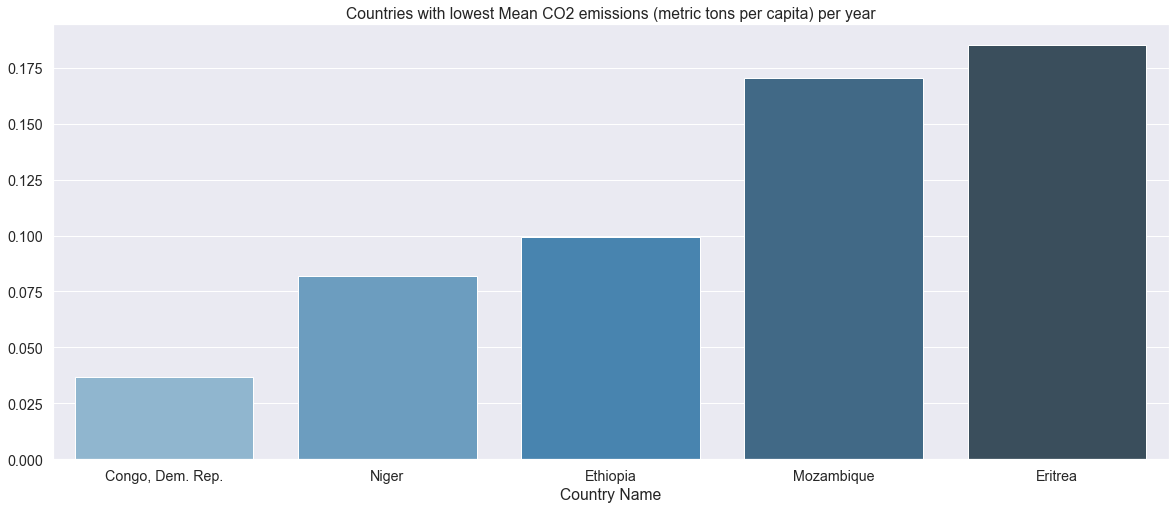

In [5]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.3) 
low = co.head(5)
sns.barplot(x=low.index, y=low.values, ci=None,palette="Blues_d")
plt.title("Countries with lowest Mean CO2 emissions (metric tons per capita) per year")

Text(0.5, 1.0, 'Countries with highest Mean CO2 emissions (metric tons per capita) per year')

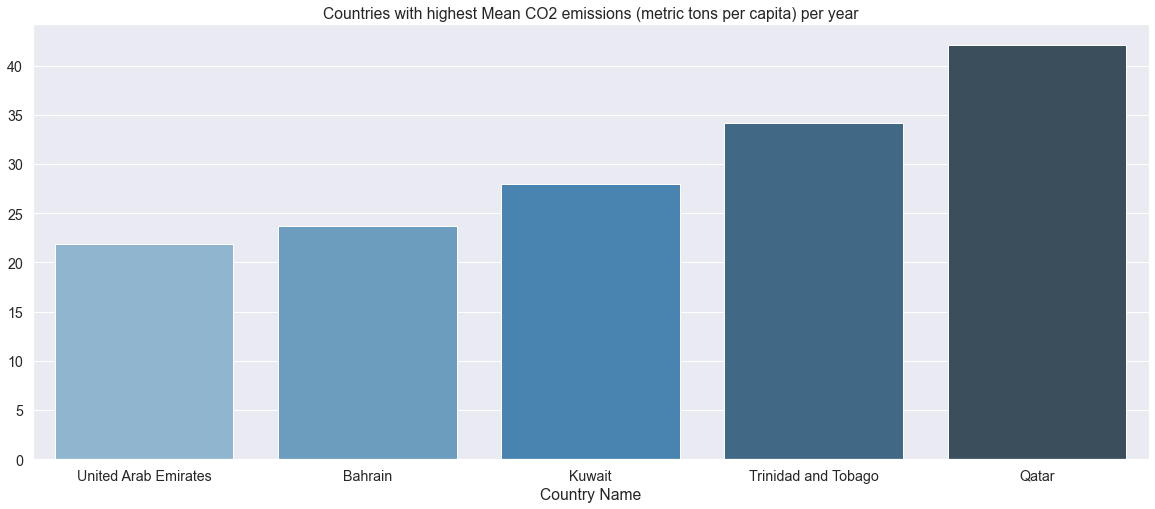

In [6]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.3) 
top = co.tail(5)
sns.barplot(x=top.index, y=top.values, ci=None,palette="Blues_d")
plt.title("Countries with highest Mean CO2 emissions (metric tons per capita) per year")

In [7]:
co_2 = co.div(co.sum()).mul(100).round(2)
co_2.head(3)

Country Name
Congo, Dem. Rep.    0.00
Niger               0.01
Ethiopia            0.01
Name: EN.ATM.CO2E.PC, dtype: float64

Text(0.5, 1.0, 'Countries with lowest Mean CO2% Contribution emissions (metric tons per capita) per year')

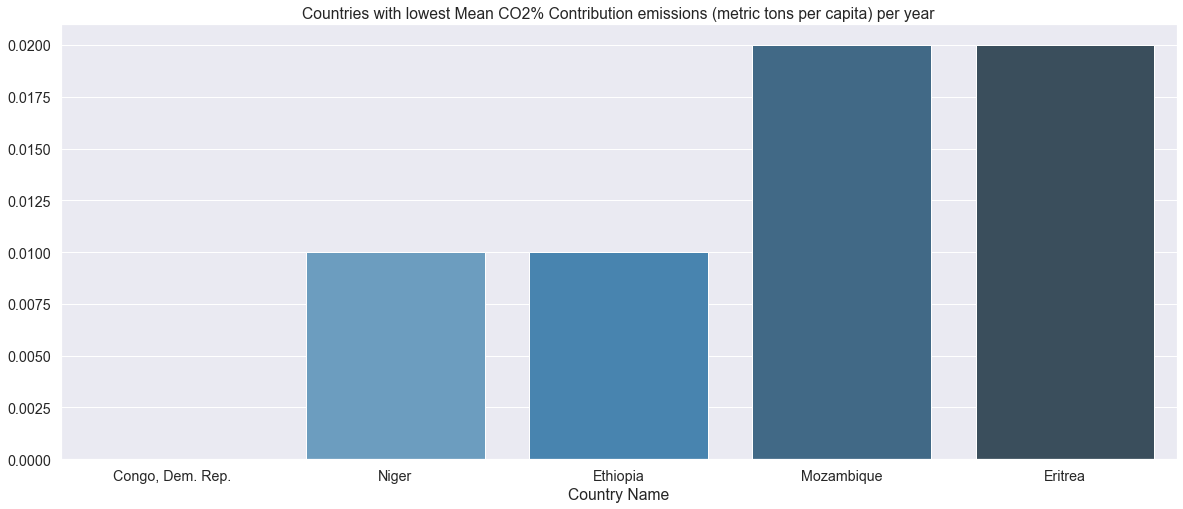

In [8]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.3) 
low = co_2.head(5)
sns.barplot(x=low.index, y=low.values, ci=None,palette="Blues_d")
plt.title("Countries with lowest Mean CO2% Contribution emissions (metric tons per capita) per year")

Text(0.5, 1.0, 'Countries with highest Mean CO2 emissions (metric tons per capita) per year')

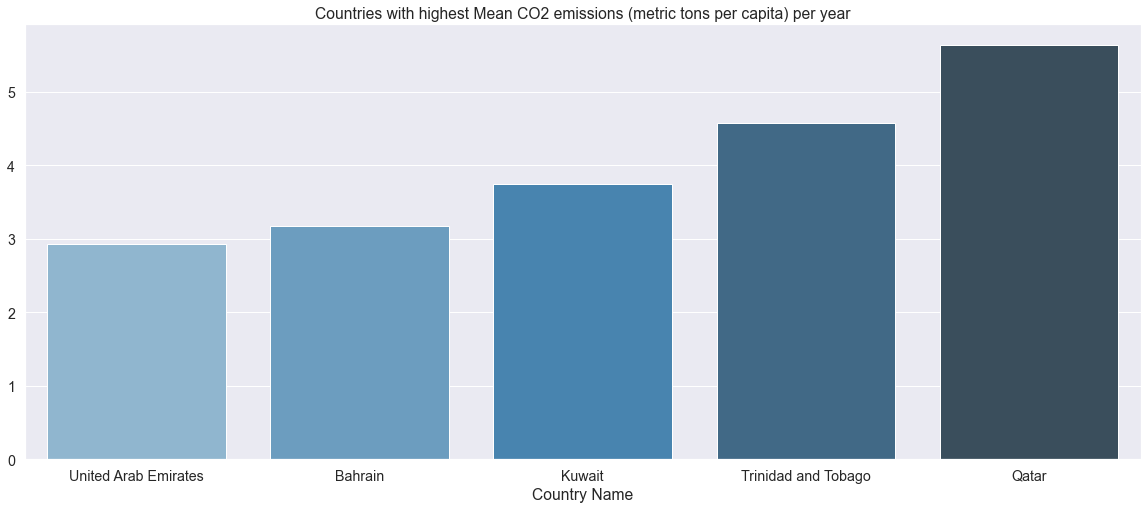

In [9]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.3) 
top = co_2.tail(5)
sns.barplot(x=top.index, y=top.values, ci=None,palette="Blues_d")
plt.title("Countries with highest Mean CO2 emissions (metric tons per capita) per year")

In [10]:
sub= country[country['Country Name'].isin([low.index[0],top.index[-1]])]
cols = ['EG.USE.COMM.CL.ZS','EN.ATM.CO2E.PC','EN.ATM.CO2E.GF.ZS','EN.ATM.CO2E.LF.ZS','EN.ATM.CO2E.SF.ZS','EG.ELC.COAL.ZS',
       'EG.ELC.HYRO.ZS','EG.ELC.NGAS.ZS','EG.ELC.NUCL.ZS','EG.ELC.PETR.ZS','EG.ELC.FOSL.ZS',
        'EG.ELC.RNWX.ZS','EG.USE.COMM.FO.ZS','EG.FEC.RNEW.ZS','NY.GDP.TOTL.RT.ZS']

compare = sub.groupby(['Country Name'])[cols].mean().round(2)
compare.T

Country Name,"Congo, Dem. Rep.",Qatar
EG.USE.COMM.CL.ZS,2.64,0.00
EN.ATM.CO2E.PC,0.04,42.08
EN.ATM.CO2E.GF.ZS,1.15,79.71
EN.ATM.CO2E.LF.ZS,89.72,12.87
EN.ATM.CO2E.SF.ZS,0.00,0.00
EG.ELC.COAL.ZS,0.00,0.00
EG.ELC.HYRO.ZS,99.24,0.00
EG.ELC.NGAS.ZS,0.58,100.00
EG.ELC.NUCL.ZS,0.00,0.00
EG.ELC.PETR.ZS,0.11,0.00


#####  EG.FEC.RNEW.ZS  Renewable energy consumption (% of total final energy consumption) is 95% for  Congo and 0% for Qatar
#####  EG.USE.COMM.FO.ZS  Fossil fuel energy consumption (% of total)) is 3.5% for  Congo and 100% for Qatar
#####  EG.ELC.FOSL.ZS Electricity production from oil, gas and coal sources (% of total) is less than 1 % for congo and 100% for Qaatr


In [25]:
co_2.sort_values(ascending=False).head(10)

Country Name
Qatar                   5.64
Trinidad and Tobago     4.58
Kuwait                  3.75
Bahrain                 3.18
United Arab Emirates    2.93
Brunei Darussalam       2.86
Luxembourg              2.63
Saudi Arabia            2.42
United States           2.28
Australia               2.27
Name: EN.ATM.CO2E.PC, dtype: float64

In [11]:
co_2.sort_values(ascending=False).cumsum().head(10)

Country Name
Qatar                    5.64
Trinidad and Tobago     10.22
Kuwait                  13.97
Bahrain                 17.15
United Arab Emirates    20.08
Brunei Darussalam       22.94
Luxembourg              25.57
Saudi Arabia            27.99
United States           30.27
Australia               32.54
Name: EN.ATM.CO2E.PC, dtype: float64

In [12]:
pivot = pd.pivot_table(country,values='EN.ATM.CO2E.PC',index='Country Name',columns='Year',aggfunc='sum')
pivot.head(3)

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
Albania,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163
Algeria,3.202067,3.173225,3.435787,3.312561,3.305571,3.477108,3.525557,3.735803,3.854557,3.699156
Angola,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861


In [13]:
pivot['%change'] = (pivot[2016]-pivot[2007])/(pivot[2007])
pivot['%change'] = pivot['%change'].mul(100).round(2)
pivot = pivot.sort_values('%change')
pivot.head(3)

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,%change
Country Name,,,,,,,,,,,
France,5.766385,5.690502,5.438357,5.428981,5.077911,5.075062,5.062172,4.573460,0.000000,0.00000,-100.00
Italy,7.917347,7.601765,6.795651,6.838375,6.702558,6.205414,5.732942,5.270867,0.000000,0.00000,-100.00
"Yemen, Rep.",0.985390,1.020428,1.090990,1.011975,0.865783,0.764021,1.013754,0.955251,0.497091,0.39048,-60.37


In [14]:
pivot.tail(3)

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,%change
Country Name,,,,,,,,,,,
Cambodia,0.253313,0.28076,0.332001,0.358188,0.358847,0.369170,0.372890,0.437654,0.555905,0.629142,148.37
Mozambique,0.104393,0.10173,0.110516,0.116252,0.133263,0.125514,0.164408,0.320857,0.239883,0.285402,173.39
Nepal,0.099102,0.12830,0.161229,0.187197,0.204631,0.216978,0.246575,0.298463,0.231435,0.333998,237.02


Text(0.5, 1.0, 'Countries with lowest % CO2 emissions (metric tons per capita) Growth')

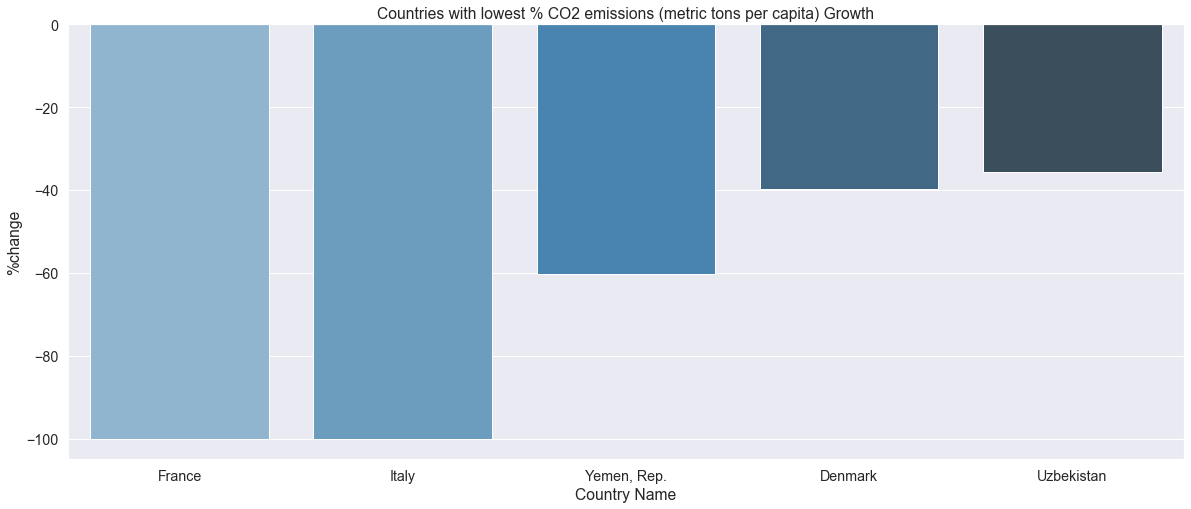

In [15]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.3) 
low = pivot.head(5)
sns.barplot(x=low.index, y=low['%change'], ci=None,palette="Blues_d")
plt.title("Countries with lowest % CO2 emissions (metric tons per capita) Growth")

Text(0.5, 1.0, 'Countries with Highest % CO2 emissions (metric tons per capita) Growth')

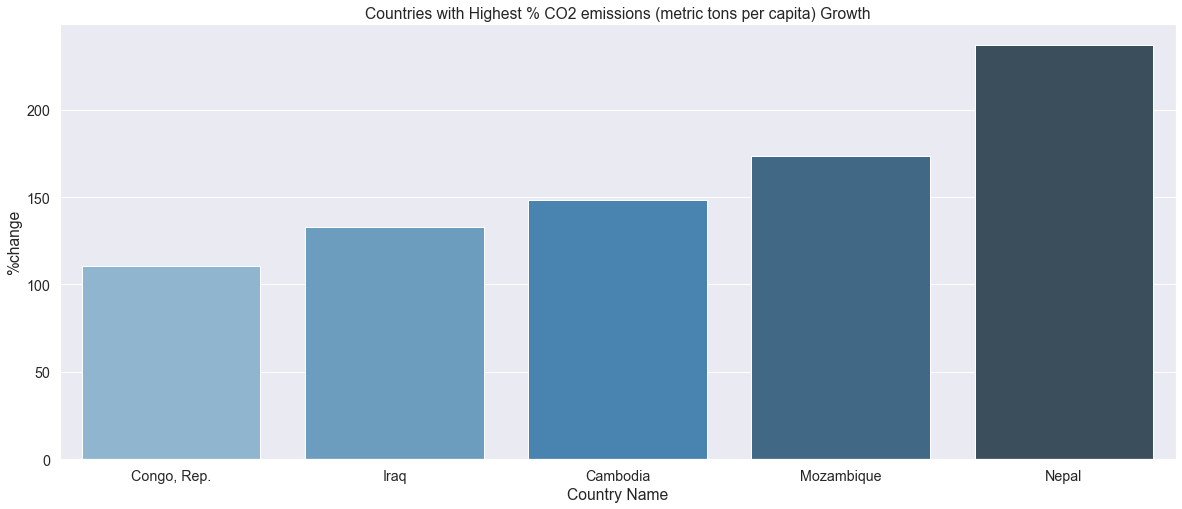

In [16]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.3) 
high = pivot.tail(5)
sns.barplot(x=high.index, y=high['%change'], ci=None, palette="Blues_d")
plt.title("Countries with Highest % CO2 emissions (metric tons per capita) Growth")

In [17]:
sub= country[(country['Country Name'].isin(['Yemen, Rep.','Nepal']))]
cols = ['EG.USE.COMM.CL.ZS','EN.ATM.CO2E.PC','EN.ATM.CO2E.GF.ZS','EN.ATM.CO2E.LF.ZS','EN.ATM.CO2E.SF.ZS','EG.ELC.COAL.ZS',
       'EG.ELC.HYRO.ZS','EG.ELC.NGAS.ZS','EG.ELC.NUCL.ZS','EG.ELC.PETR.ZS','EG.ELC.FOSL.ZS',
        'EG.ELC.RNWX.ZS','EG.USE.COMM.FO.ZS','EG.FEC.RNEW.ZS','NY.GDP.TOTL.RT.ZS']

compare = sub.groupby(['Country Name','Year'])[cols].mean()
compare = compare.dropna(axis=1)
compare = compare.T
compare.columns = [f"{count}_{year}" for count,year in compare.columns]
compare

,Nepal_2007,Nepal_2008,Nepal_2009,Nepal_2010,Nepal_2011,Nepal_2012,Nepal_2013,Nepal_2014,Nepal_2015,Nepal_2016,"Yemen, Rep._2007","Yemen, Rep._2008","Yemen, Rep._2009","Yemen, Rep._2010","Yemen, Rep._2011","Yemen, Rep._2012","Yemen, Rep._2013","Yemen, Rep._2014","Yemen, Rep._2015","Yemen, Rep._2016"
EN.ATM.CO2E.PC,0.099102,0.128300,0.161229,0.187197,0.204631,0.216978,0.246575,0.298463,0.231435,0.333998,0.985390,1.020428,1.090990,1.011975,0.865783,0.764021,1.013754,0.955251,0.497091,0.390480
EN.ATM.CO2E.GF.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000448,8.309859,6.315602,8.119239,7.897008,7.521927,14.393096,9.298306
EN.ATM.CO2E.LF.ZS,65.778401,73.954984,69.966159,64.757070,60.901259,62.680025,61.823204,57.853881,50.263930,59.242851,95.890890,94.714380,91.730109,85.790297,84.664650,81.976858,83.702532,84.198008,71.158129,76.391289
EN.ATM.CO2E.SF.ZS,28.611501,21.864952,16.243655,21.827411,20.145792,14.214152,15.690608,22.876712,33.841642,28.715264,0.000000,0.574524,0.970294,1.924883,2.241594,2.529908,1.941887,2.006838,2.700445,3.041825
NY.GDP.TOTL.RT.ZS,1.356931,1.074374,1.004465,1.471391,1.272074,1.105426,0.957902,0.977401,1.063147,1.193464,33.413682,33.950894,20.490107,23.317204,26.025735,19.119557,13.641994,11.046259,2.105149,0.797530


In [18]:
compare['Nepal %change'] = (compare['Nepal_2016']-compare['Nepal_2009'])/(compare['Nepal_2009'])
compare['Yemen %change'] = (compare['Yemen, Rep._2016']-compare['Yemen, Rep._2009'])/(compare['Yemen, Rep._2009'])
# compare = compare.replace(-np.inf,0)
compare[['Nepal %change','Yemen %change']]

,Nepal %change,Yemen %change
EN.ATM.CO2E.PC,1.071580,-0.642087
EN.ATM.CO2E.GF.ZS,NaN,2.098973
EN.ATM.CO2E.LF.ZS,-0.153264,-0.167217
EN.ATM.CO2E.SF.ZS,0.767783,2.134952
NY.GDP.TOTL.RT.ZS,0.188159,-0.961077


In [19]:
train = country.dropna()
train = train.drop(['Year','Country Name','Country Code'],axis=1)
train.shape

(1004, 35)

In [20]:
x_train = train[cols].copy()
y_train = x_train['EN.ATM.CO2E.PC'].copy()
x_train.drop(['EN.ATM.CO2E.PC'],axis=1,inplace=True)
x_train.head(3)

,EG.USE.COMM.CL.ZS,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.SF.ZS,EG.ELC.COAL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.FOSL.ZS,EG.ELC.RNWX.ZS,EG.USE.COMM.FO.ZS,EG.FEC.RNEW.ZS,NY.GDP.TOTL.RT.ZS
0,15.549632,0.840336,86.087768,1.867414,0.0,97.482517,0.00000,0.0,2.517483,2.517483,0.0,65.122392,32.100937,1.761086
1,0.039704,46.723647,35.056142,2.755153,0.0,0.607592,97.25777,0.0,2.134638,99.392408,0.0,99.752084,0.411409,32.464934
2,1.776957,6.342032,35.019682,0.000000,0.0,77.618900,0.00000,0.0,22.381100,22.381100,0.0,34.742476,61.599703,46.279012


<AxesSubplot:>

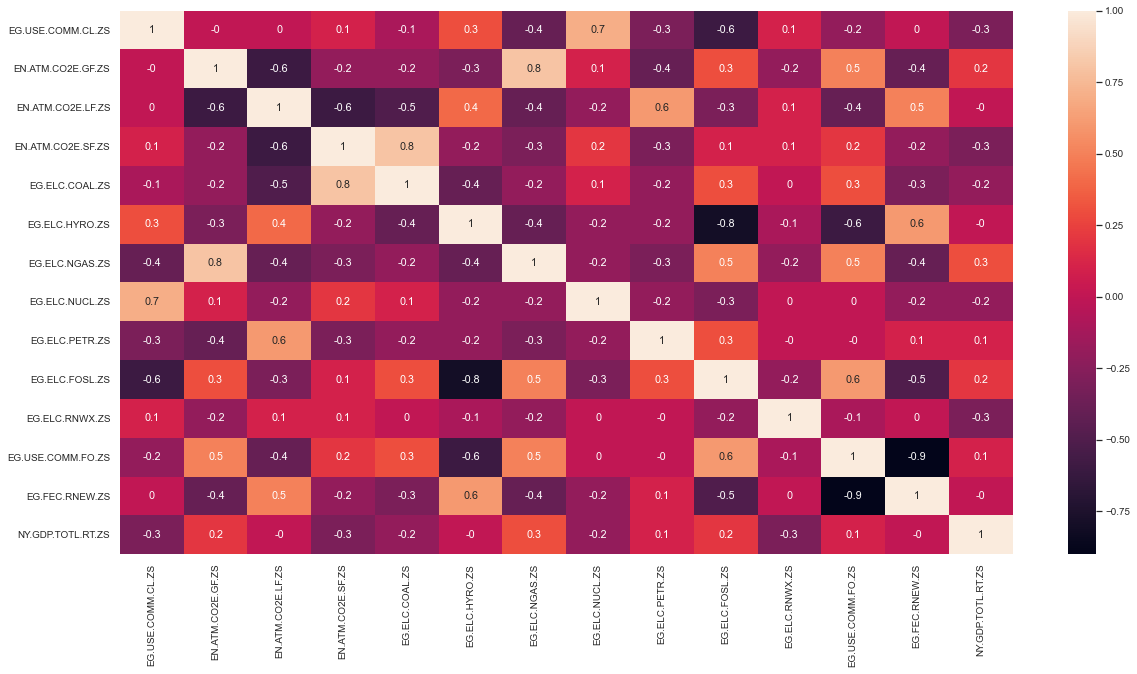

In [21]:
corr = x_train.corr().round(1)
plt.figure(figsize=(20,10))
sns.set(font_scale=0.9) 
sns.heatmap(corr, annot=True)

In [22]:
scaler = StandardScaler()
feature = x_train.columns
index=x_train.index
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=feature,index=index)
x_train.head(3)

,EG.USE.COMM.CL.ZS,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.SF.ZS,EG.ELC.COAL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.FOSL.ZS,EG.ELC.RNWX.ZS,EG.USE.COMM.FO.ZS,EG.FEC.RNEW.ZS,NY.GDP.TOTL.RT.ZS
0,0.751692,-0.947527,1.361928,-0.756806,-0.669082,2.115015,-0.855642,-0.412185,-0.510112,-1.667575,-0.596013,-0.072975,0.081732,-0.518758
1,-0.750276,1.253016,-0.751108,-0.715757,-0.669082,-0.911862,2.332501,-0.412185,-0.525204,1.247881,-0.596013,1.194362,-1.065380,1.949325
2,-0.582042,-0.683668,-0.752617,-0.843156,-0.669082,1.494372,-0.855642,-0.412185,0.272930,-1.069779,-0.596013,-1.184784,1.149542,3.059750


In [23]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         EN.ATM.CO2E.PC   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     60.82
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          8.79e-123
Time:                        00:36:06   Log-Likelihood:                -2998.0
No. Observations:                1004   AIC:                             6026.
Df Residuals:                     989   BIC:                             6100.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5165      0.15

In [24]:
drop= ['EG.ELC.COAL.ZS ','EG.ELC.HYRO.ZS','EG.ELC.NGAS.ZS','EG.ELC.PETR.ZS']